## Tugas 1: Single Layer Perceptron | PMML

Nama: Frederik Baptista Sakspari

NIM: 24/550780/PPA/06957

#### Fungsi Yang Dibutuhkan:
---
- Fungsi Init
- Fungsi Dot Product
- Fungsi Aktivasi Sigmoid
- Error Function
- Update Bias and Weight

#### Fitur Tambahan:
---
- history acc untuk train dan validation set
- history error dan sse untuk train dan validation set
- plotting/visualisasi

#### Strategi pengerjaan
---
- Kelas model di define kemudian proses training dilakukan pada dataset full dan dataset yanag sudah displit menjadi (train set dan val set) dengan perbandingan 80% train dan 20% val.

- Teknik splitting dilakukan dengan mengambil 10 data terakhir dari setiap kelas (index 40-49 -> Kelas 0; index 90-99 --> Kelas 1)

#### Hasil
---
Hasil yang di peroleh dari kode dibawah ini sama persis dengan hasil yang di dapat dari excel

## Code

#### Data Loading and Visualization

In [177]:
import pandas as pd

column_names = ['x1', 'x2', 'x3', 'x4', 'target']
iris_data = pd.read_csv('./Data.csv', header=None, names=column_names)

iris_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      100 non-null    float64
 1   x2      100 non-null    float64
 2   x3      100 non-null    float64
 3   x4      100 non-null    float64
 4   target  100 non-null    object 
dtypes: float64(4), object(1)
memory usage: 4.0+ KB


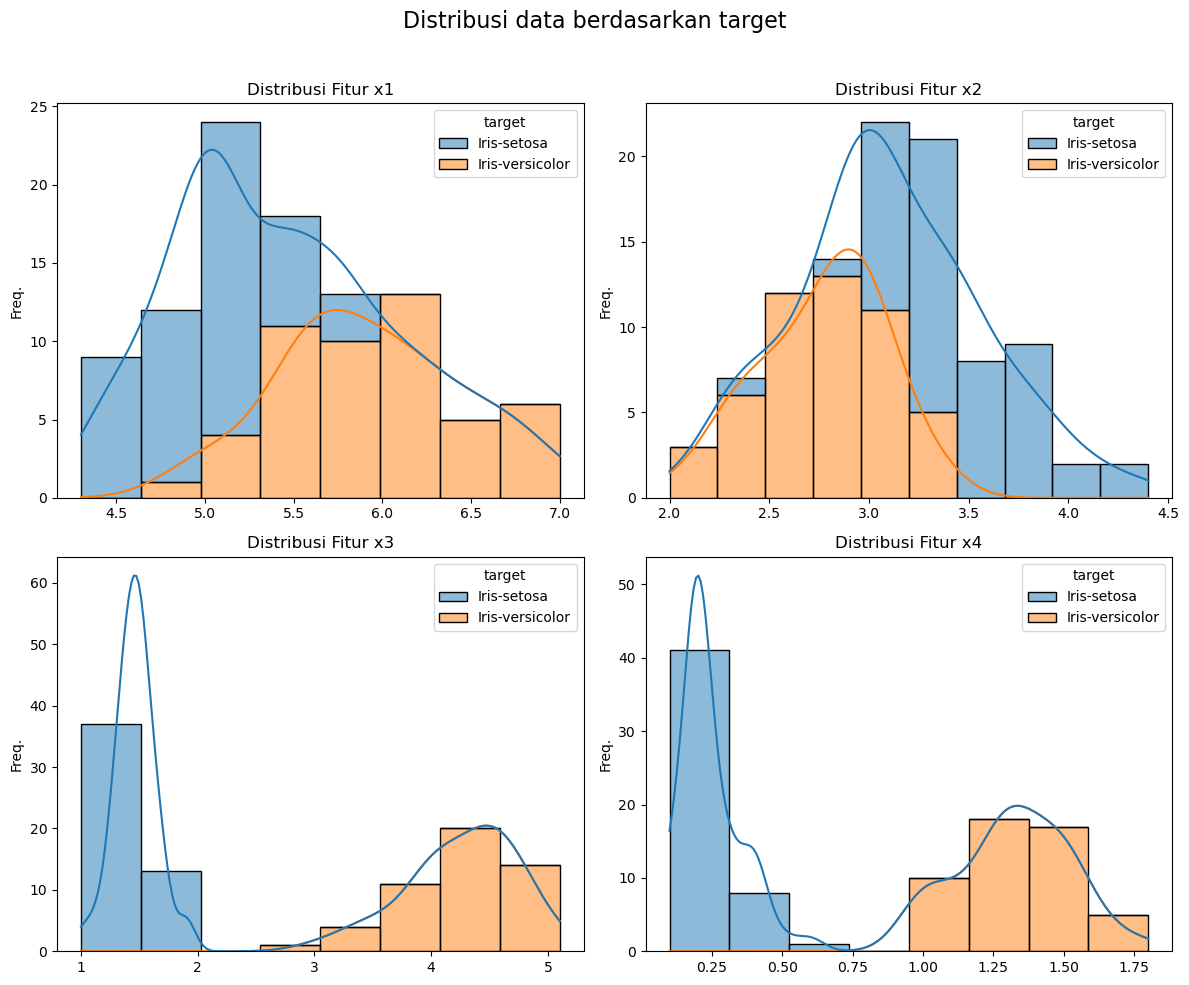

In [178]:
import matplotlib.pyplot as plt
import seaborn as sns

# distribusi data
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
fig.suptitle('Distribusi data berdasarkan target', fontsize=16)

axes = axes.flatten()
features = ['x1', 'x2', 'x3', 'x4']

for i, feature in enumerate(features):
    sns.histplot(data=iris_data, x=feature, hue='target', ax=axes[i], kde=True, multiple="stack")
    axes[i].set_title(f'Distribusi Fitur {feature}')
    axes[i].set_xlabel('')
    axes[i].set_ylabel('Freq.')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.savefig('distribusi_data.png')
plt.show()

#### Insight

dari distribusi fitur terlihat bahwa fitur-fitur dari dataset ini punya separability yang baik. ada kemungkinan kita bisa mendapatkan hasil klasifikasi yang baik dari data ini.

#### Prepare data training dan validasi

In [179]:
iris_data

,x1,x2,x3,x4,target
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
95,5.7,3.0,4.2,1.2,Iris-versicolor
96,5.7,2.9,4.2,1.3,Iris-versicolor
97,6.2,2.9,4.3,1.3,Iris-versicolor
98,5.1,2.5,3.0,1.1,Iris-versicolor


In [180]:
# mapping target into binary class
target_mapping = {
    'Iris-setosa': 0,
    'Iris-versicolor': 1
}

iris_data['target_binary'] = iris_data['target'].map(target_mapping)
iris_data


,x1,x2,x3,x4,target,target_binary
0,5.1,3.5,1.4,0.2,Iris-setosa,0
1,4.9,3.0,1.4,0.2,Iris-setosa,0
2,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5.0,3.6,1.4,0.2,Iris-setosa,0
...,...,...,...,...,...,...
95,5.7,3.0,4.2,1.2,Iris-versicolor,1
96,5.7,2.9,4.2,1.3,Iris-versicolor,1
97,6.2,2.9,4.3,1.3,Iris-versicolor,1
98,5.1,2.5,3.0,1.1,Iris-versicolor,1


In [181]:
# extract target and features
X = iris_data[['x1', 'x2', 'x3', 'x4']].values
y = iris_data['target_binary'].values

In [182]:
import numpy as np

def split_dataset(X, y, total_samples=100, samples_per_class=50, n_val_per_class=10):
    """
    Split dataset 
    take last 10 rows from each classes as validation set
    and rest 40 rows for training 
    """
    # Convert to numpy arrays if needed
    if hasattr(X, 'values'):  # pandas DataFrame
        X = X.values
    if hasattr(y, 'values'):  # pandas Series
        y = y.values

    # Define validation indices
    class_0_val = list(range(samples_per_class - n_val_per_class, samples_per_class))
    class_1_val = list(range(total_samples - n_val_per_class, total_samples))
    val_indices = class_0_val + class_1_val

    # Split into train/val
    X_val = X[val_indices]
    y_val = y[val_indices]

    train_indices = [i for i in range(len(X)) if i not in val_indices]
    X_train = X[train_indices]
    y_train = y[train_indices]

    print(f"Training set: {X_train.shape[0]} samples")
    print(f"Validation set: {X_val.shape[0]} samples")
    print(f"Features: {X_train.shape[1]} columns")

    return X_train, y_train, X_val, y_val

# Splitting data
X_train, y_train, X_val, y_val = split_dataset(X, y, total_samples=len(X), samples_per_class=50, n_val_per_class=10)

Training set: 80 samples
Validation set: 20 samples
Features: 4 columns


In [183]:
print(f"Training set: {X_train.shape[0]} samples ({X_train.shape[0]/len(X)*100:.1f}%)")
print(f"Validation set: {X_val.shape[0]} samples ({X_val.shape[0]/len(X)*100:.1f}%)")

Training set: 80 samples (80.0%)
Validation set: 20 samples (20.0%)


#### Single Layer Perceptron

In [184]:
import numpy as np

class SLP:
    """Single Layer Perceptron dengan fungsi aktivasi sigmoid | PMML """
    
    def __init__(self, input_size=4, learning_rate=0.1, weights=None, bias=None):
        """Ukuran input disesuaikan dengan jumlah fitur dari data"""
        self.input_size = input_size
        self.learning_rate = learning_rate
        if weights is None:
            self.weights = self._inisialisasi_bobot(input_size)
        else:
            self.weights = weights
        
        if bias is None:
            self.bias = self._inisialisasi_bias()
        else:
            self.bias = bias

        # model history
        self.train_error = []
        self.train_sse = []
        self.train_accuracy = []

        # save val history
        self.val_error = []
        self.val_sse = []
        self.val_accuracy = []
    
    def _inisialisasi_bobot(self, input_size):
        """Inisialisasi semua bobot secara random dari range -0.5 sampai 0.5"""
        return np.random.uniform(-0.5, 0.5, input_size)
    
    def _inisialisasi_bias(self):
        """Inisialisasi bias secara random dari range -0.5 sampai 0.5"""
        return np.random.uniform(-0.5, 0.5)
    
    def forward(self, inputs):
        """Menghitung output dari input"""
        # calculate z using dot product
        z = np.dot(inputs, self.weights.T) + self.bias
        # fungsi aktivasi sigmoid 
        gz = 1 / (1 + np.exp(-z))
        return gz
    
    def error(self, y_true, y_pred):
        """Menghitung error antara target dan prediksi"""
        return (y_pred - y_true)
    
    def sse(self, y_true, y_pred):
        return self.error(y_true, y_pred)**2
    
    def binary_prediction(self, y_pred, threshold=0.5):
        """Menghasilkan binary prediction (0 atau 1)"""
        return np.where(y_pred >= threshold, 1, 0).astype(int)
    
    def calc_accuracy(self, y_true, y_pred):
        """Menghitung akurasi dari prediksi"""
        return np.mean(y_pred == y_true)*100
    
    def predict(self, X):
        """Make predictions on new data"""
        predictions = []
        for i in range(len(X)):
            pred = self.forward(X[i])
            predictions.append(pred)
        return np.array(predictions)
    
    def predict_binary(self, X, threshold=0.5):
        """Make binary predictions on new data"""
        predictions = self.predict(X)
        return self.binary_prediction(predictions, threshold)
        
    def fit(self, X_train, y_train, X_val=None, y_val=None, epochs=5):
        """Train Model dengan data training dan validasi"""
        for epoch in range(epochs):
            # save train history
            train_pred = []
            train_pred_binary = []
            train_error = []
            train_sse = []

            # save val history
            val_pred = []
            val_pred_binary = []
            val_error = []
            val_sse = []
            
            for i in range(len(X_train)):
                # forward
                y_pred = self.forward(X_train[i])
                
                # count error
                error = self.error(y_train[i], y_pred)
                sse = self.sse(y_train[i], y_pred)
               
                # binary pred
                binary_pred = self.binary_prediction(y_pred)
                # save train history
                train_pred_binary.append(binary_pred)
                train_pred.append(y_pred)
                train_error.append(error)
                train_sse.append(sse)

                # ----- backprop ------
                # count gradient
                dw = 2*error*y_pred*(1-y_pred)*X_train[i]
                db = 2*error*y_pred*(1-y_pred)
                # update weight dan bias
                self.weights -= self.learning_rate * dw
                self.bias -= self.learning_rate * db

            if X_val is not None and y_val is not None:
                for i in range(len(X_val)):
                    # forward
                    y_pred = self.forward(X_val[i])

                    # count error
                    error = self.error(y_val[i], y_pred)
                    sse = self.sse(y_val[i], y_pred)

                    # binary pred
                    binary_pred = self.binary_prediction(y_pred)

                    # save val history
                    val_pred_binary.append(binary_pred)
                    val_pred.append(y_pred)
                    val_error.append(error)
                    val_sse.append(sse)

                print(f"Epoch {epoch+1}/{epochs}, Train Error: {np.mean(train_error):.4f}, Train SSE: {np.mean(train_sse):.4f}, Train Accuracy: {self.calc_accuracy(y_train, train_pred_binary):.2f}%, Val Error: {np.mean(val_error):.4f}, Val SSE: {np.mean(val_sse):.4f}, Val Accuracy: {self.calc_accuracy(y_val, val_pred_binary):.2f}%")
                
                # save model history
                self.val_accuracy.append(self.calc_accuracy(y_val, val_pred_binary))
                self.val_error.append(np.mean(val_error))
                self.val_sse.append(np.mean(val_sse))
            else:
                print(f"Epoch {epoch+1}/{epochs}, Train Error: {np.mean(train_error):.4f}, Train SSE: {np.mean(train_sse):.4f}, Train Accuracy: {self.calc_accuracy(y_train, train_pred_binary):.2f}%")

            # save model history
            self.train_accuracy.append(self.calc_accuracy(y_train, train_pred_binary))
            self.train_error.append(np.mean(train_error))
            self.train_sse.append(np.mean(train_sse))

    def plot_error_and_sse(self, epochs):
        """Plot loss pelatihan dan validasi"""
        plt.figure(figsize=(8, 5))
        plt.plot(range(1, epochs + 1), self.train_error, marker='o', label="Train Error")
        plt.plot(range(1, epochs + 1), self.train_sse, marker='^', label="Train SSE")
        if len(self.val_error)!=0:
            plt.plot(range(1, epochs + 1), self.val_error, marker='o', label="Val Error")
            plt.plot(range(1, epochs + 1), self.val_sse, marker='^', label="Val SSE")
        plt.xlabel("Epoch")
        plt.ylabel("Error & SSE")
        plt.title("Error and SSE Per Epoch")
        plt.xticks(range(1, epochs + 1))
        plt.legend()
        plt.tight_layout()
        plt.show()

    def plot_accuracy(self, epochs):
        """Plot akurasi pelatihan dan validasi"""
        plt.figure(figsize=(8, 5))
        plt.plot(range(1, epochs + 1), self.train_accuracy, marker='o', label="Train Acc.")
        for i, acc in enumerate(self.train_accuracy):
            plt.text(i + 1, acc, f'{acc}', ha='center', va='bottom')
        if len(self.val_accuracy)!=0:
            plt.plot(range(1, epochs + 1), self.val_accuracy, marker='o', label="Val Acc.")
            for i, acc in enumerate(self.val_accuracy):
                plt.text(i + 1, acc, f'{acc}', ha='center', va='bottom')
        plt.xlabel("Epoch")
        plt.ylabel("Akurasi (%)")
        plt.title("Akurasi Per Epoch")
        plt.xticks(range(1, epochs + 1))
        plt.legend()
        plt.tight_layout()
        plt.show()

In [185]:
import copy # cegah bias saling share/ karena disimpana di lokasi memori yang sama

# define variable sesuai spreadsheet
lr = .1
weights = np.array([.5, .5, .5, .5])
bias = .5
input_size = 4
n_epoch = 5

# define model to test with full dataset without slpitting
model_full = SLP(input_size=input_size, learning_rate=lr, weights=copy.deepcopy(weights), bias=copy.deepcopy(bias))

# Define model to test with split dataset
model_split = SLP(input_size=input_size, learning_rate=lr, weights=copy.deepcopy(weights), bias=copy.deepcopy(bias))


In [186]:
# train with full dataset; untuk perbandingan yang lebih valid
model_full.fit(X, y, epochs=n_epoch)

Epoch 1/5, Train Error: 0.3337, Train SSE: 0.3689, Train Accuracy: 61.00%
Epoch 2/5, Train Error: 0.0052, Train SSE: 0.0308, Train Accuracy: 96.00%
Epoch 3/5, Train Error: 0.0070, Train SSE: 0.0200, Train Accuracy: 98.00%
Epoch 4/5, Train Error: 0.0076, Train SSE: 0.0143, Train Accuracy: 98.00%
Epoch 5/5, Train Error: 0.0093, Train SSE: 0.0105, Train Accuracy: 99.00%


In [187]:
# perform fit with split dataset
model_split.fit(X_train, y_train, X_val, y_val, epochs=n_epoch)

Epoch 1/5, Train Error: 0.4186, Train SSE: 0.4499, Train Accuracy: 52.50%, Val Error: 0.3855, Val SSE: 0.3290, Val Accuracy: 50.00%
Epoch 2/5, Train Error: 0.0060, Train SSE: 0.0375, Train Accuracy: 95.00%, Val Error: 0.3307, Val SSE: 0.2473, Val Accuracy: 50.00%
Epoch 3/5, Train Error: 0.0078, Train SSE: 0.0244, Train Accuracy: 97.50%, Val Error: 0.2750, Val SSE: 0.1759, Val Accuracy: 50.00%
Epoch 4/5, Train Error: 0.0086, Train SSE: 0.0174, Train Accuracy: 97.50%, Val Error: 0.2217, Val SSE: 0.1194, Val Accuracy: 85.00%
Epoch 5/5, Train Error: 0.0106, Train SSE: 0.0127, Train Accuracy: 98.75%, Val Error: 0.1787, Val SSE: 0.0816, Val Accuracy: 100.00%


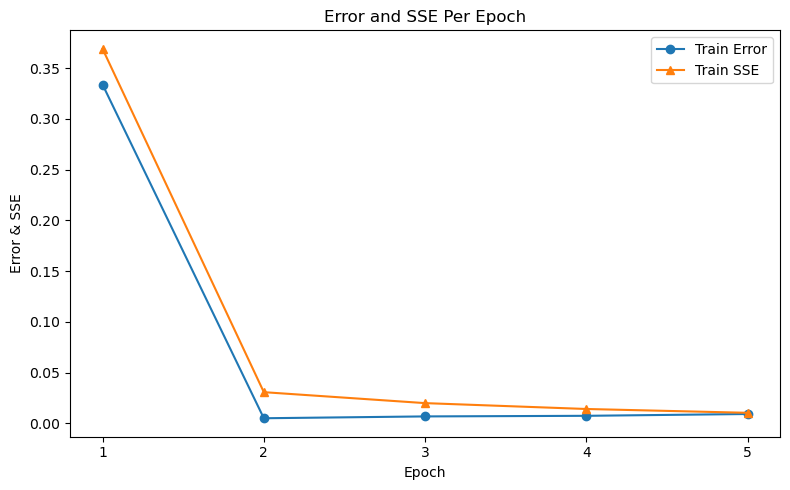

In [188]:
model_full.plot_error_and_sse(epochs=5)

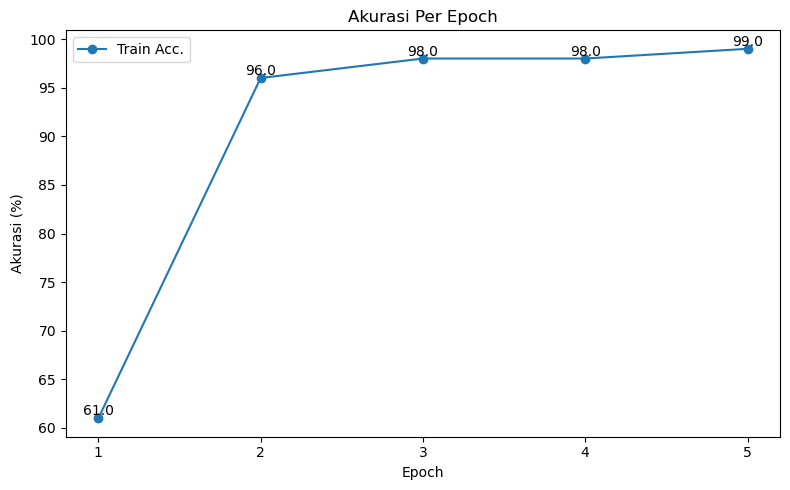

In [189]:
model_full.plot_accuracy(epochs=5)

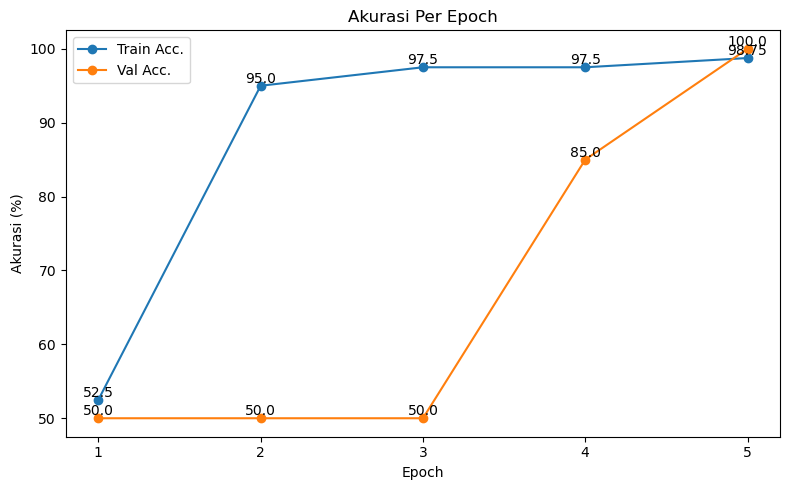

In [190]:
model_split.plot_accuracy(epochs=5)

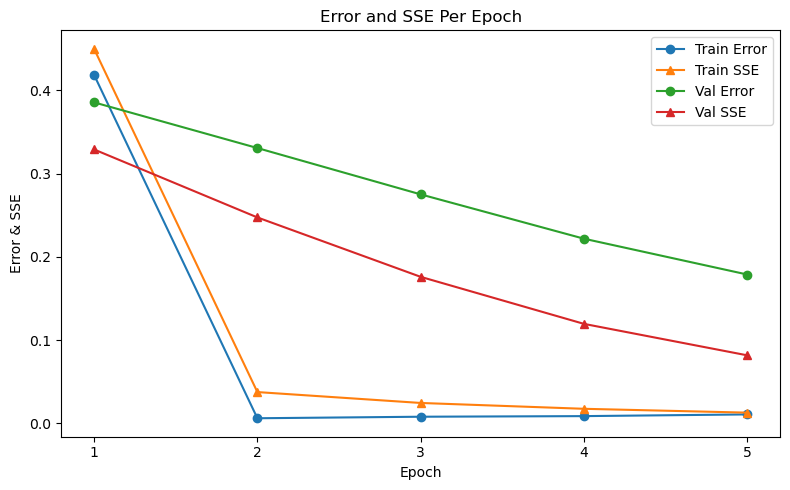

In [191]:
model_split.plot_error_and_sse(epochs=5)